Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

**Problem Statement**

Prepare a prediction model for profit of 50_startups data.

Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

Features

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit -- profit of each state in the past few years

Importing Dataset

In [2]:
startups=pd.read_csv('/content/50_Startups.csv')
startups.head(50)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Renaming the columns name

In [4]:
startups=startups.rename({'R&D Spend': 'RnDSpend','Marketing Spend': 'MarketingSpend', 'Profit': 'profit', 'State':'State'}, axis=1)

Descriptive Analysis

In [5]:
startups.describe()

,RnDSpend,Administration,MarketingSpend,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Checking for missing values

In [6]:
startups.isna().sum()

RnDSpend          0
Administration    0
MarketingSpend    0
State             0
profit            0
dtype: int64

In [7]:
startups=startups.drop('State', axis='columns')
startups=pd.DataFrame(startups)

In [8]:
startups.describe()

,RnDSpend,Administration,MarketingSpend,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
#Format the plot background and scatter plots for all the variables
#sns.set_style(style='darkgrid')
#sns.pairplot('startups')

# EDA

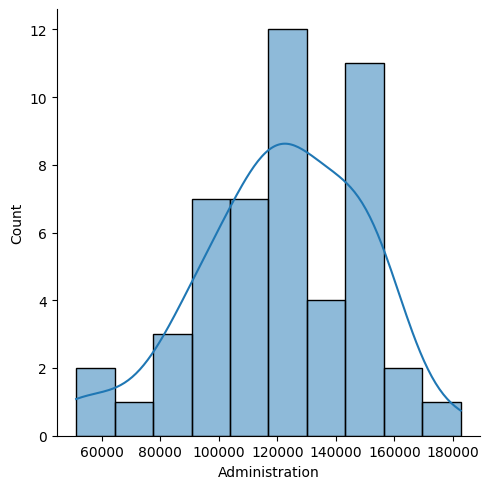

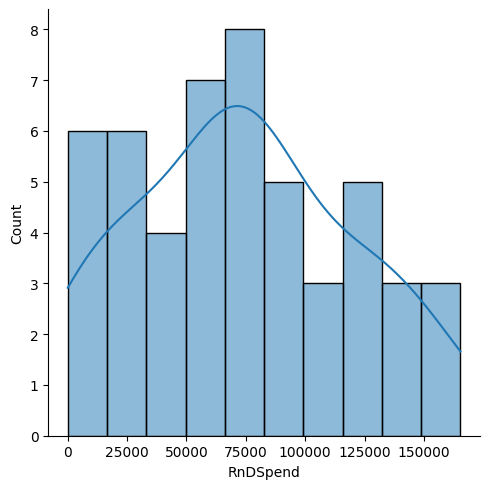

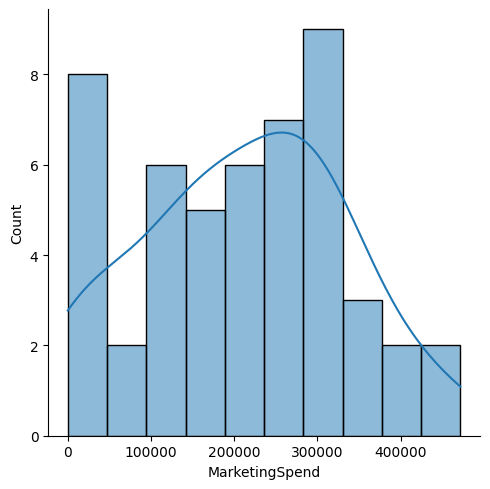

In [ ]:
#sns.distplot(df['Delivery Time'], bins = 10, kde = True)
sns.displot(startups['Administration'], bins = 10, kde = True)
sns.displot(startups['RnDSpend'], bins = 10, kde = True)
sns.displot(startups['MarketingSpend'], bins = 10, kde = True)

Preparing a model without removing skwenes and outliers

In [10]:
#Build model
model= smf.ols('profit~RnDSpend+Administration+MarketingSpend', data = startups).fit()

In [11]:
#Beta Coefficients
model.params

Intercept         50122.192990
RnDSpend              0.805715
Administration       -0.026816
MarketingSpend        0.027228
dtype: float64

In [12]:
#Predicted Values for profit
model.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [13]:
startups['Predictions_Model']=model.fittedvalues

In [14]:
startups.head()

,RnDSpend,Administration,MarketingSpend,profit,Predictions_Model
0,165349.20,136897.80,471784.10,192261.83,192521.252890
1,162597.70,151377.59,443898.53,191792.06,189156.768232
2,153441.51,101145.55,407934.54,191050.39,182147.279096
3,144372.41,118671.85,383199.62,182901.99,173696.700026
4,142107.34,91391.77,366168.42,166187.94,172139.514183


In [15]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
RnDSpend          17.846374
Administration    -0.525507
MarketingSpend     1.655077
dtype: float64 
 Intercept         1.057379e-09
RnDSpend          2.634968e-22
Administration    6.017551e-01
MarketingSpend    1.047168e-01
dtype: float64


**Null Hypothesis - The independent variable is not at all significantly related to the dependent variable**

**Alternate Hypothesis - The independent variable is significantly related to the dependent variable**

For any variable, if p-value<0.05, then we can consider that variable to be useful/significant to predict the dependent variable.

In [16]:
model.pvalues

Intercept         1.057379e-09
RnDSpend          2.634968e-22
Administration    6.017551e-01
MarketingSpend    1.047168e-01
dtype: float64

In [17]:
#R squared values
model.rsquared

0.9507459940683246

**Transformations on Independent Variables To make better R^2**

In [20]:
import scipy.stats as stats

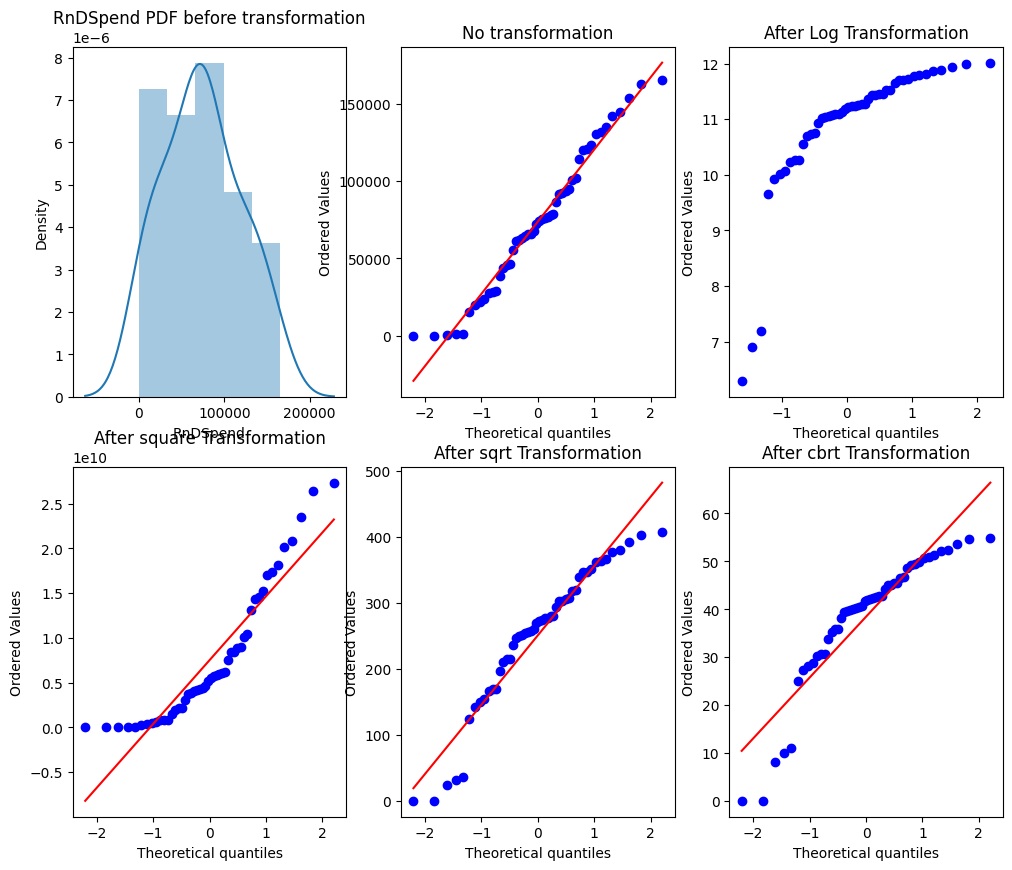

In [22]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.distplot(startups['RnDSpend'])
plt.title('RnDSpend PDF before transformation')

plt.subplot(232)
stats.probplot(startups['RnDSpend'], dist="norm", plot=plt)
plt.title('No transformation')

plt.subplot(233)
stats.probplot(np.log(startups['RnDSpend']), dist="norm", plot=plt,)
plt.title('After Log Transformation')

plt.subplot(234)
stats.probplot(np.square(startups['RnDSpend']), dist="norm", plot=plt,)
plt.title('After square Transformation')

plt.subplot(235)
stats.probplot(np.sqrt(startups['RnDSpend']), dist="norm", plot=plt,)
plt.title('After sqrt Transformation')

plt.subplot(236)
stats.probplot(np.cbrt(startups['RnDSpend']), dist="norm", plot=plt,)
plt.title('After cbrt Transformation')


plt.show()

In RnDSpend feature , after with different transofrmation Skweness increases more. So, we didn't required to transform

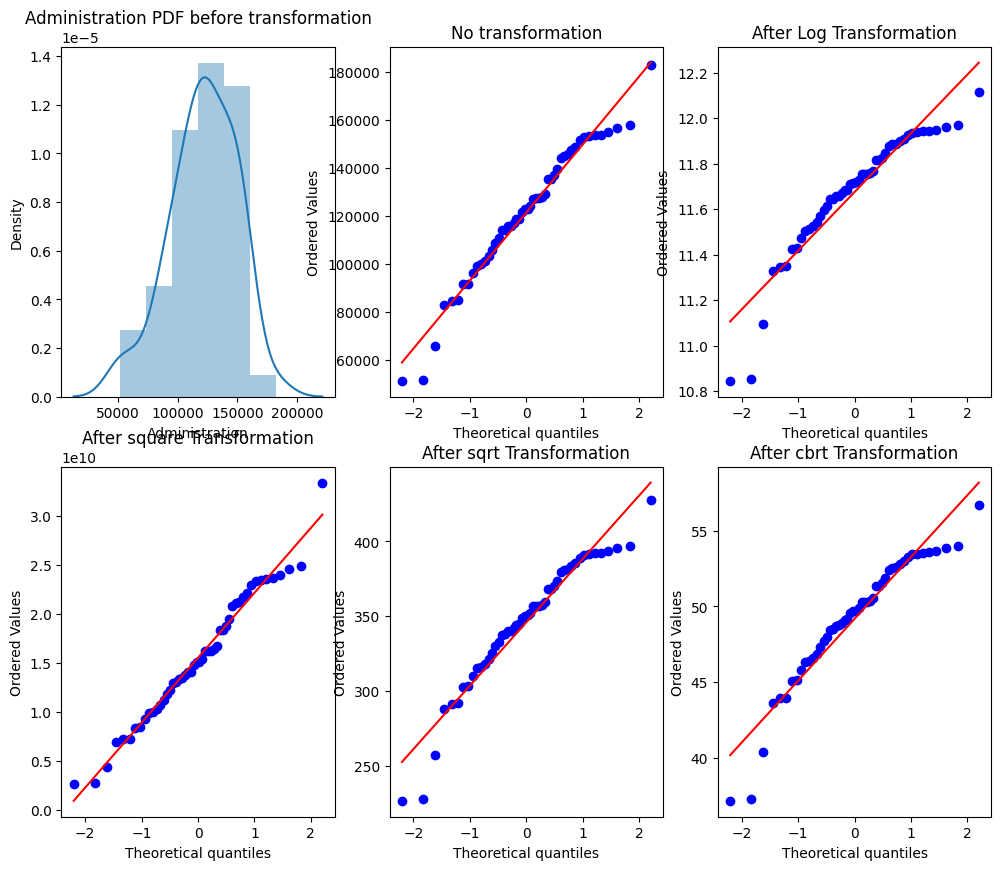

In [23]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.distplot(startups['Administration'])
plt.title('Administration PDF before transformation')

plt.subplot(232)
stats.probplot(startups['Administration'], dist="norm", plot=plt)
plt.title('No transformation')

plt.subplot(233)
stats.probplot(np.log(startups['Administration']), dist="norm", plot=plt,)
plt.title('After Log Transformation')

plt.subplot(234)
stats.probplot(np.square(startups['Administration']), dist="norm", plot=plt,)
plt.title('After square Transformation')

plt.subplot(235)
stats.probplot(np.sqrt(startups['Administration']), dist="norm", plot=plt,)
plt.title('After sqrt Transformation')

plt.subplot(236)
stats.probplot(np.cbrt(startups['Administration']), dist="norm", plot=plt,)
plt.title('After cbrt Transformation')


plt.show()

In Administration feature , after different form of transofrmation, square transformation is better.

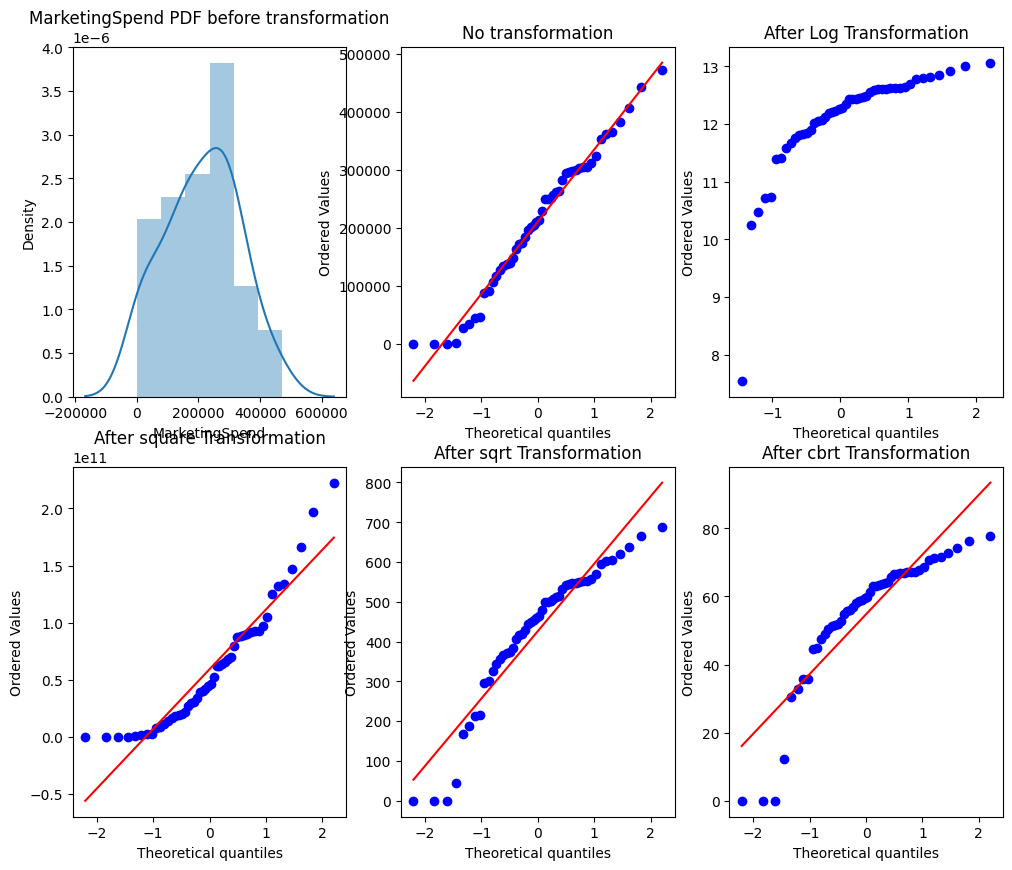

In [24]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.distplot(startups['MarketingSpend'])
plt.title('MarketingSpend PDF before transformation')

plt.subplot(232)
stats.probplot(startups['MarketingSpend'], dist="norm", plot=plt)
plt.title('No transformation')

plt.subplot(233)
stats.probplot(np.log(startups['MarketingSpend']), dist="norm", plot=plt,)
plt.title('After Log Transformation')

plt.subplot(234)
stats.probplot(np.square(startups['MarketingSpend']), dist="norm", plot=plt,)
plt.title('After square Transformation')

plt.subplot(235)
stats.probplot(np.sqrt(startups['MarketingSpend']), dist="norm", plot=plt,)
plt.title('After sqrt Transformation')

plt.subplot(236)
stats.probplot(np.cbrt(startups['MarketingSpend']), dist="norm", plot=plt,)
plt.title('After cbrt Transformation')


plt.show()

In MarketingSpend feature , after applying with different transofrmation Skweness increases more. So, we didn't required to transform

In [29]:
startups1=startups.copy()
startups1.drop(['Predictions_Model'], axis=1, inplace =True)
startups1.head()

,RnDSpend,Administration,MarketingSpend,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [30]:

startups1['Administration']=np.square(startups['Administration']) 



In [31]:
#Build model
model1= smf.ols('profit~RnDSpend+Administration+MarketingSpend', data = startups1).fit()

In [32]:
model1.fittedvalues

0     192461.398232
1     188957.713156
2     182260.473267
3     173784.319054
4     172248.011222
5     163695.495098
6     158134.588949
7     159928.582952
8     151608.446121
9     155023.905215
10    135667.558024
11    135707.422280
12    129205.036669
13    127491.036883
14    149349.794806
15    146346.484764
16    116984.991771
17    130087.273407
18    129109.263846
19    115601.376541
20    116714.022750
21    117078.803526
22    114740.614360
23    110070.104723
24    113552.975509
25    102244.946410
26    110577.538381
27    114378.037833
28    101034.172477
29    101672.546966
30     99637.794365
31     97576.371975
32     99149.903841
33     98032.635306
34     88763.129688
35     90580.420109
36     75305.754942
37     89383.816560
38     69609.855835
39     83798.015283
40     74897.168746
41     74873.898121
42     70735.276352
43     60275.246106
44     64462.826129
45     47781.552016
46     56143.174474
47     46543.747308
48     49015.305800
49     48349.131911


In [33]:
startups1['prediction_model1']=model1.fittedvalues

In [34]:
model1.pvalues

Intercept         4.584971e-15
RnDSpend          2.572514e-22
Administration    5.579357e-01
MarketingSpend    1.164287e-01
dtype: float64

In [35]:
model1.rsquared

0.9508227152697435

There little improvement in R^2 after applying different form of transformation.